# __init__

In [23]:
cd C:/Users/roman/python_docs/python_docs

C:\Users\roman\python_docs\python_docs


C:\Users\roman\miniconda3\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size']  = 16
plt.rcParams['lines.linewidth']  = 2.7
plt.rcParams['lines.markeredgewidth'] = 3
plt.rcParams['lines.markersize'] = 8

from DataCleanerUpper import cleaner

In [25]:
cd 10x10_heater_testing/

C:\Users\roman\python_docs\python_docs\10x10_heater_testing


# 1 window vs 4 windows CHF performance

In [26]:
# Propper data 2 march 1st.
file1 = pd.read_csv("10x10_4_windows_withtexture/TCRTesting_Heater_10_ 2024-06-25 13_24_03.txt")
data1 = cleaner(file1.targetpower)

file2 = pd.read_csv("10x10_4_windows_withtexture/TCRTesting_Heater_10_ 2024-06-25 14_15_50.txt")
data2 = cleaner(file2.targetpower)

file3 = pd.read_csv("10x10_4_windows_withtexture/TCRTesting_Heater_10_ 2024-06-25 15_13_46.txt")
data3 = cleaner(file3.targetpower)

file4 = pd.read_csv("10x10_4_windows_withtexture/TCRTesting_Heater_10_ 2024-06-25 16_13_51.txt")
data4 = cleaner(file4.targetpower)

file_baseline = pd.read_csv("10x10_wicks_1_window/TCRTesting_Heater_10_ 2024-07-01 13_34_46.txt")
data_baseline = cleaner(file_baseline.targetpower)

file_baseline2 = pd.read_csv("10x10_wicks_1_window/TCRTesting_Heater_10_ 2024-06-25 10_36_52.txt")
data_baseline2 = cleaner(file_baseline2.targetpower)

file_baseline3 = pd.read_csv("10x10_wicks_1_window/TCRTesting_Heater_10_ 2024-06-25 12_19_44.txt")
data_baseline3 = cleaner(file_baseline3.targetpower)

file_baseline4 = pd.read_csv("10x10_wicks_1_window/TCRTesting_Heater_10_ 2024-06-25 11_31_55.txt")
data_baseline4 = cleaner(file_baseline4.targetpower)


R = (0.0656-0.0160)/1.70 # thermal resistance of the chip

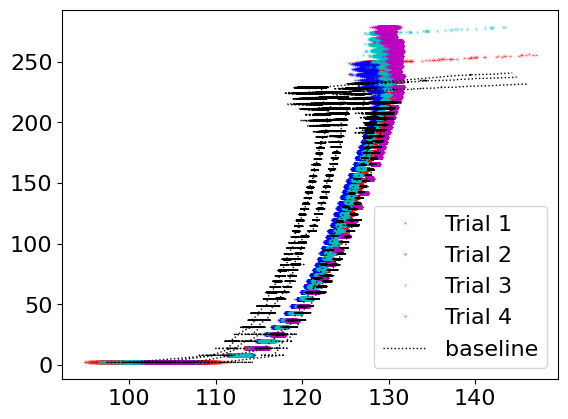

In [27]:
# RAW data with transience removed
plt.rcParams['lines.linewidth']  = 1
plt.rcParams['lines.markersize'] = 0.3

data1.cut = 1000
Tsnip1 = data1.trimmer(file1.temperature)
Psnip1 = data1.trimmer(file1.power)

data2.cut = 1000
Tsnip2 = data2.trimmer(file2.temperature)
Psnip2 = data2.trimmer(file2.power)

data3.cut = 1000
Tsnip3 = data3.trimmer(file3.temperature)
Psnip3 = data3.trimmer(file3.power)

data4.cut = 1000
Tsnip4 = data4.trimmer(file4.temperature)
Psnip4 = data4.trimmer(file4.power)

data_baseline.cut = 1000
Tsnip_baseline = data_baseline.trimmer(file_baseline.temperature)
Psnip_baseline = data_baseline.trimmer(file_baseline.power)

data_baseline2.cut = 1000
Tsnip_baseline2 = data_baseline2.trimmer(file_baseline2.temperature)
Psnip_baseline2 = data_baseline2.trimmer(file_baseline2.power)

data_baseline3.cut = 1000
Tsnip_baseline3 = data_baseline3.trimmer(file_baseline3.temperature)
Psnip_baseline3 = data_baseline3.trimmer(file_baseline3.power)

data_baseline4.cut = 1000
Tsnip_baseline4 = data_baseline4.trimmer(file_baseline4.temperature)
Psnip_baseline4 = data_baseline4.trimmer(file_baseline4.power)



plt.plot(Tsnip1,Psnip1,'1r',
        Tsnip2,Psnip2,'2b',
        Tsnip3,Psnip3,'3c',
        Tsnip4,Psnip4,'2m',
        Tsnip_baseline,Psnip_baseline,':k',
        Tsnip_baseline2,Psnip_baseline2,':k',
        Tsnip_baseline3,Psnip_baseline3,':k',
        Tsnip_baseline4,Psnip_baseline4,':k')
#        file2.temperature[2000:], file2.power[2000:]*4,':b',
#        file3.temperature[2000:], file3.power[2000:]*4,'-c',
#        file4.temperature[2000:], file4.power[2000:]*4,':m',
#        file5.temperature[2000:], file5.power[2000:]*4,'-g')
plt.legend(['Trial 1','Trial 2','Trial 3','Trial 4','baseline'],loc = 'lower right')

plt.savefig('raw_data.png');

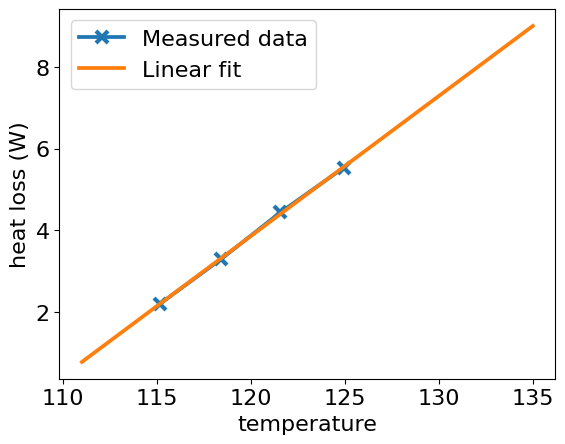

In [28]:
plt.rcParams['lines.linewidth']  = 2.7
plt.rcParams['lines.markersize'] = 8

def hloss(temp,hl):
    hl = temp*hl[0] + hl[1]
    return(hl)

def Tdrop(power,R):
    "R = dx/k" # what was R???
    # q" = k dt/dx 
    # q" dx/k = dt
    Tdrop = power*R
    return(Tdrop)

def HTC(P,T):
    h = P/(T-100)
    return(h)

def tcrfix(R,Ro,To):
    tcr = 0.00156792
    
    T = (R-Ro)/Ro/tcr + To
    return(T)

hlfile = pd.read_csv('10x10_heat_loss/TCRTesting_Heater_10_ 2024-07-01 14_23_18.txt')
datahl = cleaner(hlfile.targetpower)
datahl.cut = 100

[Rhl,Rerrhl] = datahl.TAPAWSD(hlfile.Rsample)
Phl = datahl.TAPA(hlfile.power)
Thl = tcrfix(Rhl,hlfile.Ro[0],92.5)


hl = np.polyfit(Thl[1:-1],Phl[1:-1],1) # THE HL EQUATION IS: hl[0]*T+hl[1]

plt.plot(Thl[1:-1],Phl[1:-1],'-x',np.linspace(111,135,100),hl[0]*np.linspace(111,135,100)+hl[1]);
plt.xlabel('temperature')
plt.ylabel('heat loss (W)')

plt.legend(['Measured data','Linear fit'])
plt.savefig('heat loss regression.png',dpi=1200)

Average CHF 255.66471127851398
Maximum CHF 273.9281177311909
Minimum CHF 240.22876214249678
baseline CHF 219.7525320871354


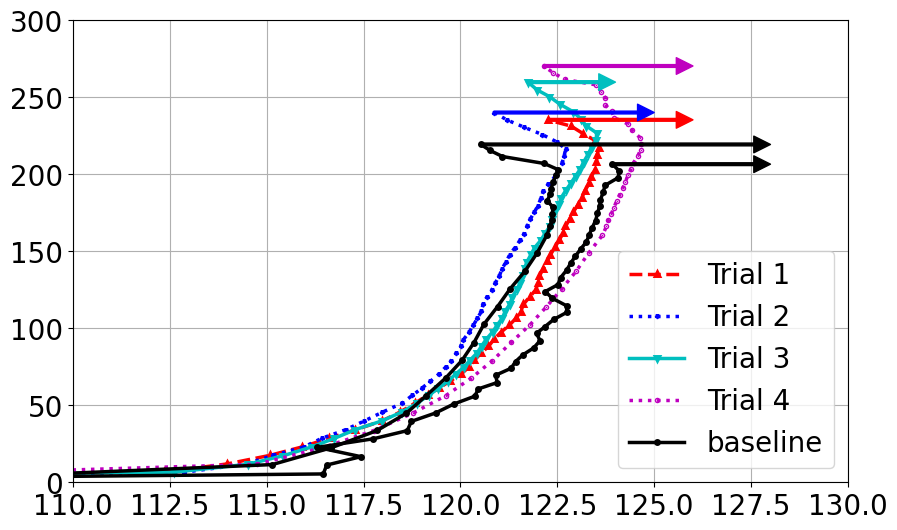

In [60]:
plt.rcParams['lines.linewidth']  = 2.5
plt.rcParams['lines.markersize'] = 2

[R1,Terr1] = data1.TAPAWSD(file1.Rsample)
T1 = tcrfix(R1,file1.Ro[0],file1.pooltemp[0])
P1 = data1.TAPA(file1.power)
T1 += - Tdrop(P1,R)
P1 += - hloss(T1,hl)
H1 = HTC(P1,T1)



[R2,Terr2] = data2.TAPAWSD(file2.Rsample)
T2 = tcrfix(R2,file2.Ro[0],file2.pooltemp[0])
P2 = data2.TAPA(file2.power)
T2 += - Tdrop(P2,R) 
P2 += - hloss(T2,hl)
H2 = HTC(P2,T2)

[R3,Terr3] = data3.TAPAWSD(file3.Rsample)
T3 = tcrfix(R3,file3.Ro[0],file3.pooltemp[0])
P3 = data3.TAPA(file3.power)
T3 += - Tdrop(P3,R)
P3 += - hloss(T3,hl)
H3 = HTC(P3,T3)

[R4,Terr4] = data4.TAPAWSD(file4.Rsample)
T4 = tcrfix(R4,file4.Ro[0],file4.pooltemp[0])
P4 = data4.TAPA(file4.power)
T4 += - Tdrop(P4,R)
P4 += - hloss(T4,hl)
H4 = HTC(P4,T4)

[R_baseline,Terr_baseline] = data_baseline.TAPAWSD(file_baseline.Rsample)
T_baseline = tcrfix(R_baseline,file_baseline.Ro[0],file_baseline.pooltemp[0])
P_baseline = data_baseline.TAPA(file_baseline.power)
T_baseline += - Tdrop(P_baseline,R)
P_baseline += - hloss(T_baseline,hl)
H_baseline = HTC(P_baseline,T_baseline)

[R_baseline2,Terr_baseline2] = data_baseline2.TAPAWSD(file_baseline2.Rsample)
T_baseline2 = tcrfix(R_baseline2,file_baseline2.Ro[0],file_baseline2.pooltemp[0])
P_baseline2 = data_baseline2.TAPA(file_baseline2.power)
T_baseline2 += - Tdrop(P_baseline2,R)
P_baseline2 += - hloss(T_baseline2,hl)
H_baseline2 = HTC(P_baseline2,T_baseline2)

[R_baseline3,Terr_baseline3] = data_baseline3.TAPAWSD(file_baseline3.Rsample)
T_baseline3 = tcrfix(R_baseline3,file_baseline3.Ro[0],file_baseline3.pooltemp[0])
P_baseline3 = data_baseline3.TAPA(file_baseline3.power)
T_baseline3 += - Tdrop(P_baseline3,R)
P_baseline3 += - hloss(T_baseline3,hl)
H_baseline3 = HTC(P_baseline3,T_baseline3)

[R_baseline4,Terr_baseline4] = data_baseline4.TAPAWSD(file_baseline4.Rsample)
T_baseline4 = tcrfix(R_baseline4,file_baseline4.Ro[0],file_baseline4.pooltemp[0])
P_baseline4 = data_baseline4.TAPA(file_baseline4.power)
T_baseline4 += - Tdrop(P_baseline4,R)
P_baseline4 += - hloss(T_baseline4,hl)
H_baseline4 = HTC(P_baseline4,T_baseline4)


fig, ax = plt.subplots(figsize=(10, 6))
#plt.errorbar()    # T2,P2*4,xerr=Terr2)
ax.plot(T1[1:-2],P1[1:-2],'--^r',
        T2[1:-2],P2[1:-2],':*b',
        T3[1:-2],P3[1:-2],'-vc',
        T4[1:-2],P4[1:-2],':.m',
        T_baseline[1:-2],P_baseline[1:-2],'-ok',
       T_baseline2[1:-2],P_baseline2[1:-2],'-ok')
       #T_baseline3[1:-2],P_baseline3[1:-2],'-ok',
       #T_baseline4[1:-2],P_baseline4[1:-2],'-ok')
plt.grid()
plt.ylim([0,300])
plt.xlim([110,130])
ax.annotate("",xytext = (T1[-3],P1[-3]),xy=(126,P1[-3]),arrowprops=dict(width = 2,fc = 'r',ec = 'r'))
ax.annotate("",xytext = (T2[-3],P2[-3]),xy=(125,P2[-3]),arrowprops=dict(width = 2,fc = 'b',ec = 'b'))
ax.annotate("",xytext = (T3[-3],P3[-3]),xy=(124,P3[-3]),arrowprops=dict(width = 2,fc = 'c',ec = 'c'))
ax.annotate("",xytext = (T4[-3],P4[-3]),xy=(126,P4[-3]),arrowprops=dict(width = 2,fc = 'm',ec = 'm'))
ax.annotate("",xytext = (T_baseline[-3],P_baseline[-3]),xy=(128,P_baseline[-3]),arrowprops=dict(width = 2,fc = 'k',ec ='k' ))
ax.annotate("",xytext = (T_baseline2[-3],P_baseline2[-3]),xy=(128,P_baseline2[-3]),arrowprops=dict(width = 2,fc = 'k',ec ='k' ))
#ax.annotate("",xytext = (T_baseline3[-3],P_baseline3[-3]),xy=(128,P_baseline3[-3]),arrowprops=dict(width = 2,fc = 'k',ec ='k' ))
#ax.annotate("",xytext = (T_baseline4[-3],P_baseline4[-3]),xy=(128,P_baseline4[-3]),arrowprops=dict(width = 2,fc = 'k',ec ='k' ))


print('Average CHF',np.average([P1[-2],P2[-2],P3[-2],P4[-2]]))
print('Maximum CHF',np.max([P1[-2],P2[-2],P3[-2],P4[-2]]))
print('Minimum CHF',np.min([P1[-2],P2[-2],P3[-2],P4[-2]]))
print('baseline CHF',np.average([P_baseline[-2],P_baseline2[-2],P_baseline3[-2],P_baseline4[-2]]))
ax.legend(['Trial 1','Trial 2','Trial 3','Trial 4','baseline'],loc = 'lower right')
plt.savefig('CHF data_new_2024.png',dpi = 1200)


In [30]:
(273-224)/224

0.21875

In [31]:
# HTC   q = h*A*dt
# h = q/A/dt

def HTC(P,T):
    h = P/(T-100)
    return(h)

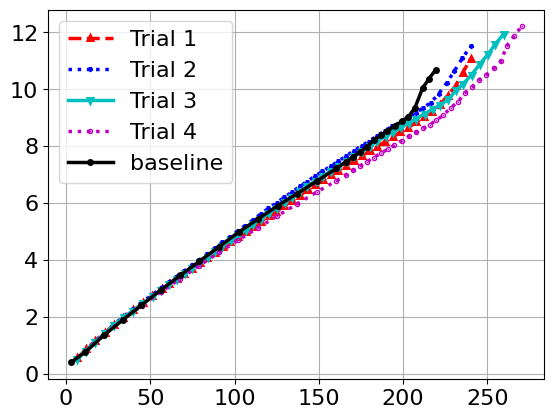

In [32]:
plt.plot(P1[2:-1],H1[2:-1],'--^r',
         P2[2:-2],H2[2:-2],':*b',
         P3[2:-2],H3[2:-2],'-vc',
         P4[2:-2],H4[2:-2],':.m',
         P_baseline[1:-2],H_baseline[1:-2],'-ok');


plt.grid()
plt.legend(['Trial 1','Trial 2','Trial 3','Trial 4','baseline','Trial 6',],loc = 'upper left')

plt.savefig("HTC vs P.png __ new 2024.png",dpi = 1200)

In [33]:
#area covered for 4 windows
1 - (0.06*1*2-0.06**2)

0.8836

In [34]:
#area covered for 9 windows
1 - (0.04*1*4 - 0.04**2*4) 

0.8464

In [35]:
#area covered for 9 windows
1 - (0.04*1*9 - 0.04**2*6) 

0.6496

# number of windows

In [99]:
file9windows1 = pd.read_csv("10x10_9_windows/TCRTesting_Heater_10_ 2024-07-01 12_49_12.txt")
data9windows1 = cleaner(file9windows1.targetpower)

file9windows2 = pd.read_csv("10x10_9_windows/TCRTesting_Heater_10_ 2024-07-01 10_46_00.txt")
data9windows2 = cleaner(file9windows2.targetpower)


file9windows3 = pd.read_csv("10x10_9_windows/TCRTesting_Heater_10_ 2024-07-01 11_13_57.txt")
data9windows3 = cleaner(file9windows3.targetpower)

file9windows4 = pd.read_csv("10x10_9_windows/TCRTesting_Heater_10_ 2024-07-01 11_43_32.txt")
data9windows4 = cleaner(file9windows4.targetpower)

file9windows5 = pd.read_csv("10x10_9_windows/TCRTesting_Heater_10_ 2024-07-01 12_14_15.txt")
data9windows5 = cleaner(file9windows5.targetpower)

R = (0.0656-0.0160)/1.70 # thermal resistance of the chip

In [112]:
P9_5

array([         nan,   2.87069897,  12.21416022,  23.45417158,
        34.47538689,  45.86813282,  57.24138335,  68.47582757,
        79.87438209,  91.29613005, 103.13912629, 114.27796848,
       125.97396987, 137.66077191, 149.40035638, 161.09025196,
       166.21482092, 170.26471704, 174.38525336, 178.47754151,
       182.61272956, 186.87131646, 191.16436199, 194.92264911,
       199.29867681, 203.00993673, 207.50372583, 211.35690015,
       215.98342831, 219.93607998, 223.85539347, 227.88170761,
       232.01649288,          nan])

[219.7525320871354, 255.66471127851398, 225.8918107890948]


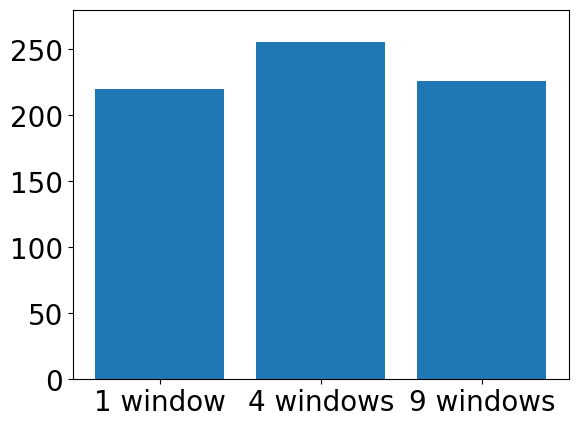

In [121]:
plt.rcParams['lines.linewidth']  = 1
plt.rcParams['lines.markersize'] = 0.3

# get corrections for 9 windows


[R9_1,Terr9_1] = data9windows1.TAPAWSD(file9windows1.Rsample)
T9_1 = tcrfix(R9_1,file9windows1.Ro[0],file9windows1.pooltemp[0])
P9_1 = data9windows1.TAPA(file9windows1.power)
T9_1 += - Tdrop(P9_1,R)
P9_1 += - hloss(T9_1,hl)
H9_1 = HTC(P9_1,T9_1)


[R9_2,Terr9_2] = data9windows2.TAPAWSD(file9windows2.Rsample)
T9_2 = tcrfix(R9_2,file9windows2.Ro[0],file9windows2.pooltemp[0])
P9_2 = data9windows2.TAPA(file9windows2.power)
T9_2 += - Tdrop(P9_2,R)
P9_2 += - hloss(T9_2,hl)
H9_2 = HTC(P9_2,T9_2)


[R9_3,Terr9_3] = data9windows3.TAPAWSD(file9windows3.Rsample)
T9_3 = tcrfix(R9_3,file9windows3.Ro[0],file9windows3.pooltemp[0])
P9_3 = data9windows3.TAPA(file9windows3.power)
T9_3 += - Tdrop(P9_3,R)
P9_3 += - hloss(T9_3,hl)
H9_3 = HTC(P9_3,T9_3)

[R9_4,Terr9_4] = data9windows4.TAPAWSD(file9windows4.Rsample)
T9_4 = tcrfix(R9_4,file9windows4.Ro[0],file9windows4.pooltemp[0])
P9_4 = data9windows4.TAPA(file9windows4.power)
T9_4 += - Tdrop(P9_4,R)
P9_4 += - hloss(T9_4,hl)
H9_4 = HTC(P9_4,T9_4)

[R9_5,Terr9_5] = data9windows5.TAPAWSD(file9windows5.Rsample)
T9_5 = tcrfix(R9_5,file9windows5.Ro[0],file9windows5.pooltemp[0])
P9_5 = data9windows5.TAPA(file9windows5.power)
T9_5 += - Tdrop(P9_5,R)
P9_5 += - hloss(T9_5,hl)
H9_5 = HTC(P9_5,T9_5)

baseline_average = np.average([P_baseline[-2],P_baseline2[-2],P_baseline3[-2],P_baseline4[-2]])
windows_4_average = np.average([P1[-2],P2[-2],P3[-2],P4[-2]])
windows_9_average = np.average([P9_1[-2],P9_2[-2],P9_3[-2],P9_4[-2],P9_5[-2]])

print([baseline_average,windows_4_average,windows_9_average])


plt.bar(['1 window','4 windows','9 windows'],[baseline_average,windows_4_average,windows_9_average])
plt.ylim([0,280])
#plt.plot(Tsnip1w,Psnip1w,'2b',Tsnip4w,Psnip4w/0.9216,'1r',Tsnip9w,Psnip9w/0.8464,'2m')
#plt.legend(['1 window','4 windows','9 windows' ],loc = 'lower right')
#print(['1 window','4 windows','9 windows'])
#print([Psnip1w[-2],Psnip4w[-2],Psnip9w[-2]])

plt.savefig('bar_graph_1_4_9_windows.png')

['1 window', '4 windows', '9 windows']
[219.7525320871354, 277.41396623102645, 266.88540972246545]


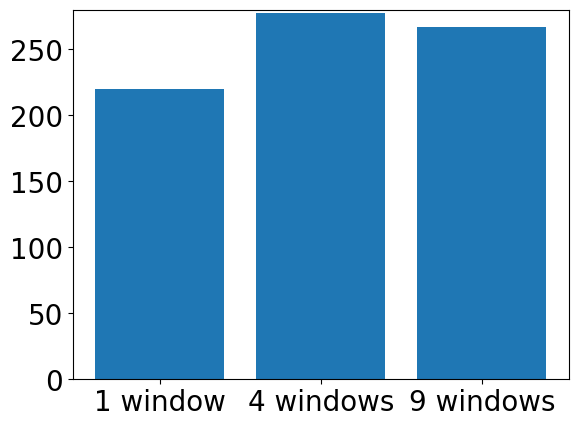

In [122]:
# RAW data with transience removed
plt.rcParams['lines.linewidth']  = 1
plt.rcParams['lines.markersize'] = 0.3
plt.rcParams['font.size'] = 20

data4windows.cut = 1000
Tsnip4w = data4.trimmer(file4.temperature)
Psnip4w = data4.trimmer(file4.power)

data1window.cut = 1000
Tsnip1w = data_baseline.trimmer(file_baseline.temperature)
Psnip1w = data_baseline.trimmer(file_baseline.power)

data9windows.cut = 1000
Tsnip9w = data9windows.trimmer(file9windows.temperature)
Psnip9w = data9windows.trimmer(file9windows.power)

#[Tsnip1w[-2],Tsnip4w[-2],Tsnip9w[-2]],[Psnip1w[-2],Psnip4w[-2],Psnip9w[-2]]
plt.bar(['1 window','4 windows','9 windows'],[baseline_average,windows_4_average/0.9216,windows_9_average/0.8464])
#plt.plot(Tsnip1w,Psnip1w,'2b',Tsnip4w,Psnip4w/0.9216,'1r',Tsnip9w,Psnip9w/0.8464,'2m')
#plt.legend(['1 window','4 windows','9 windows' ],loc = 'lower right')
plt.ylim([0,280])

print(['1 window','4 windows','9 windows'])
print([baseline_average,windows_4_average/0.9216,windows_9_average/0.8464])
plt.savefig('bar_graph_1_4_9_windows_corrected_for_size.png');

# window width

In [112]:
# Propper data 2 march 1st.
file400windows = pd.read_csv("10x10_4_windows_withtexture/TCRTesting_Heater_10_ 2024-06-25 16_13_51.txt")
data400windows = cleaner(file400windows.targetpower)

file300window = pd.read_csv("10x10_4_windows_300um_spacing/TCRTesting_Heater_10_ 2024-07-01 16_15_15.txt")
data300window = cleaner(file300window.targetpower)

file600windows = pd.read_csv("10x10_4_windows_600um_spacing/TCRTesting_Heater_10_ 2024-07-02 11_32_32.txt")
data600windows = cleaner(file600windows.targetpower)

R = (0.0656-0.0160)/1.70 # thermal resistance of the chip

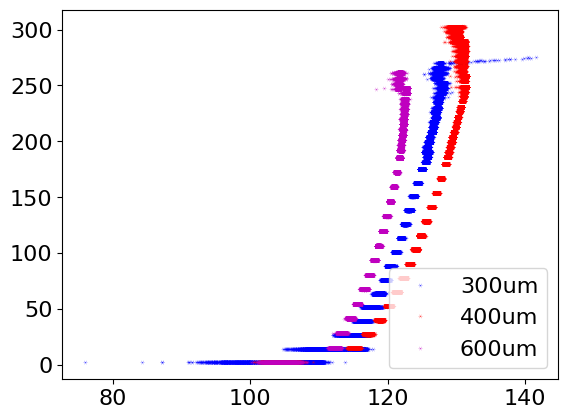

In [123]:
# RAW data with transience removed
plt.rcParams['lines.linewidth']  = 1
plt.rcParams['lines.markersize'] = 0.3

data400windows.cut = 1000
Tsnip400um = data400windows.trimmer(file400windows.temperature)
Psnip400um = data400windows.trimmer(file400windows.power)/0.9216

data300window.cut = 1000
Tsnip300um = data300window.trimmer(file300window.temperature)
Psnip300um = data300window.trimmer(file300window.power)/0.9409

data600windows.cut = 1000
Tsnip600um = data600windows.trimmer(file600windows.temperature)
Psnip600um = data600windows.trimmer(file600windows.power)/0.8836

plt.plot(Tsnip300um,Psnip300um,'2b',Tsnip400um,Psnip400um,'1r',Tsnip600um,Psnip600um,'2m')
plt.legend(['300um','400um','600um' ],loc = 'lower right')

#plt.savefig('raw_data.png');